# Import Library

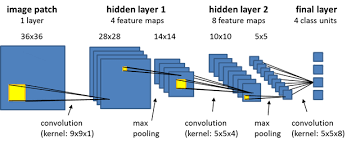

In [33]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Dataset

# CIFR10 Dataset

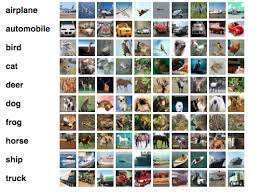

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 13s 0us/step


(50000, 32, 32, 3)

# Check shape of a dataset

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [5]:
y_train.shape

(50000, 1)

# y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

# plot some images

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

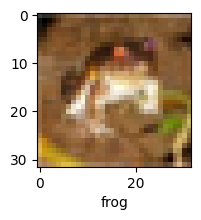

In [11]:
plot_sample(X_train, y_train, 0)

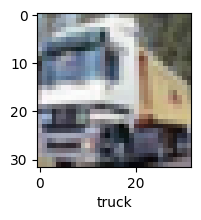

In [12]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255
# Normalizing the training data


In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#  Build simple artificial neural network for image classification


In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 11s 4ms/step - loss: 1.8111 - accuracy: 0.3534
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6236 - accuracy: 0.4276
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5414 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4812 - accuracy: 0.4794
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4310 - accuracy: 0.4947


# You can see that at the end of 5 epochs, accuracy is at around 49%

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.51      0.53      1000
           1       0.33      0.87      0.48      1000
           2       0.37      0.39      0.38      1000
           3       0.35      0.27      0.31      1000
           4       0.57      0.17      0.27      1000
           5       0.35      0.46      0.40      1000
           6       0.59      0.43      0.50      1000
           7       0.64      0.45      0.53      1000
           8       0.61      0.60      0.61      1000
           9       0.57      0.34      0.43      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.44     10000
weighted avg       0.49      0.45      0.44     10000



#  Now let us build a convolutional neural network to train our images


In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 4ms/step - loss: 1.4456 - accuracy: 0.4821
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1034 - accuracy: 0.6136
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9742 - accuracy: 0.6610
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8898 - accuracy: 0.6920
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8230 - accuracy: 0.7168
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7685 - accuracy: 0.7330
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7218 - accuracy: 0.7504
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6733 - accuracy: 0.7655
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6358 - accuracy: 0.7777
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.59

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5648 - accuracy: 0.8007
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5271 - accuracy: 0.8140
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5001 - accuracy: 0.8247
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4708 - accuracy: 0.8338
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4415 - accuracy: 0.8430
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4157 - accuracy: 0.8528
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3878 - accuracy: 0.8632
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3686 - accuracy: 0.8685
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3473 - accuracy: 0.8763
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.325

# With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2843 - accuracy: 0.6803


[1.2842830419540405, 0.6802999973297119]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.96711426e-05, 2.24475230e-07, 1.05734638e-04, 9.94638741e-01,
        4.78690254e-06, 4.29603970e-03, 8.78868275e-04, 7.58183472e-09,
        1.78901228e-05, 3.79774829e-05],
       [1.35148726e-02, 5.62740117e-02, 6.15630142e-06, 5.21647447e-10,
        2.92333865e-13, 1.30791614e-10, 6.15712442e-15, 8.21841374e-14,
        9.30203915e-01, 1.02177705e-06],
       [3.00035477e-01, 2.05075607e-01, 1.80699606e-03, 1.84465444e-03,
        5.05399890e-04, 1.01996749e-03, 1.21108369e-05, 7.66853191e-05,
        3.67604226e-01, 1.22018814e-01],
       [9.93312538e-01, 6.39288046e-05, 4.88669612e-04, 1.96136034e-06,
        3.60648468e-04, 6.13622841e-09, 4.15596280e-10, 8.85697375e-07,
        5.77144790e-03, 4.22472834e-10],
       [1.49536911e-11, 2.14385267e-07, 9.17094294e-03, 4.02755613e-05,
        5.84430806e-02, 2.30937826e-06, 9.32343006e-01, 1.43906111e-12,
        2.66477713e-07, 1.22938909e-10]], dtype=float32)

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.96711426e-05, 2.24475230e-07, 1.05734638e-04, 9.94638741e-01,
        4.78690254e-06, 4.29603970e-03, 8.78868275e-04, 7.58183472e-09,
        1.78901228e-05, 3.79774829e-05],
       [1.35148726e-02, 5.62740117e-02, 6.15630142e-06, 5.21647447e-10,
        2.92333865e-13, 1.30791614e-10, 6.15712442e-15, 8.21841374e-14,
        9.30203915e-01, 1.02177705e-06],
       [3.00035477e-01, 2.05075607e-01, 1.80699606e-03, 1.84465444e-03,
        5.05399890e-04, 1.01996749e-03, 1.21108369e-05, 7.66853191e-05,
        3.67604226e-01, 1.22018814e-01],
       [9.93312538e-01, 6.39288046e-05, 4.88669612e-04, 1.96136034e-06,
        3.60648468e-04, 6.13622841e-09, 4.15596280e-10, 8.85697375e-07,
        5.77144790e-03, 4.22472834e-10],
       [1.49536911e-11, 2.14385267e-07, 9.17094294e-03, 4.02755613e-05,
        5.84430806e-02, 2.30937826e-06, 9.32343006e-01, 1.43906111e-12,
        2.66477713e-07, 1.22938909e-10]], dtype=float32)

In [34]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

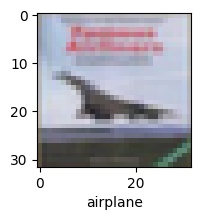

In [24]:
plot_sample(X_test, y_test,3)

In [29]:
classes[y_classes[3]]

'airplane'

In [31]:
classes[y_classes[3]]

'airplane'